In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np


a = 0.02
b = 0.2
c = -65.0
d = 8.0


def izhikevich_equ(t, y, current=lambda t: 10):
    v, u = y
    return [0.04 * v*v + 5 * v + 140 - u + current(t),
            a * (b * v - u)]


def potential_threshold(t, y):
    v, u = y
    return 30 - v
potential_threshold.terminal = True


def simulate_izhikevich_model(t_max, current):
    cur_t = 0
    v = c
    u = b * c
    t_list = []
    v_list = []
    e_list = []
    
    while cur_t < t_max:
        sol = solve_ivp((lambda t, y: izhikevich_equ(t, y, current)), [cur_t, cur_t + 20], [v, u], 
                         events=potential_threshold, max_step=5e-2)
        t = sol.t
        v, u = sol.y[:, -1]
        
        # event occurrence
        if sol.status == 1:
            v, u = c, u + d
            e_list.append(sol.t_events[0][0])
            
        cur_t = t[-1]
        t_list.append(t)
        v_list.append(sol.y[0])

    t_list = np.hstack(t_list)
    v_list = np.hstack(v_list)
    return t_list, v_list, e_list

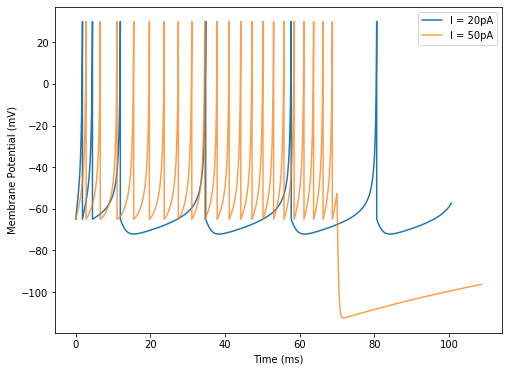

In [191]:
t1_list, v1_list, _ = simulate_izhikevich_model(100, lambda t: 20)
t2_list, v2_list, _ = simulate_izhikevich_model(100, lambda t: 50)
t2_list, v2_list, e = simulate_izhikevich_model(100, lambda t: (10 + 1.5 * t if t < 70 else 0))

plt.figure(figsize=(8, 6))
plt.plot(t1_list, v1_list, label="I = 20pA")
plt.plot(t2_list, v2_list, alpha=0.75, label="I = 50pA")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.savefig("simulation.svg", transparent=True)

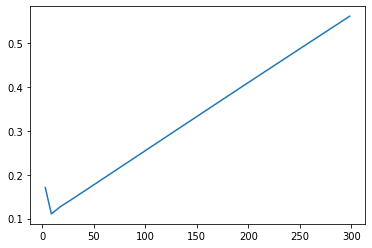

In [187]:
plt.plot(e[:-1], 1 / np.diff(e))

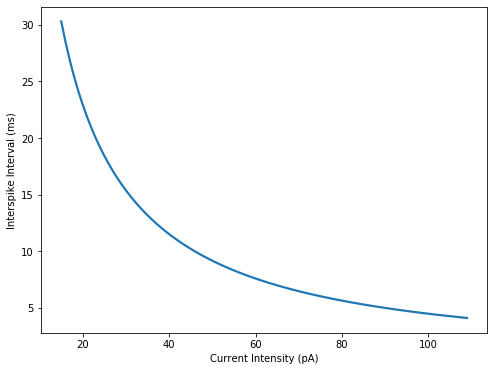

In [169]:
def freq(e_list):
    return np.diff(e_list)[-5:].mean()


# curl = range(15, 110)
# el = []
# for i in curl:
#     _, _, e_list = simulate_izhikevich_model(300, lambda t: i)
#     el.append(e_list)

plt.figure(figsize=(8, 6))
plt.plot(list(curl), list(map(freq, el)), lw=2.2)
plt.xlabel("Current Intensity (pA)")
plt.ylabel("Interspike Interval (ms)")
plt.savefig("isi.svg", transparent=True)

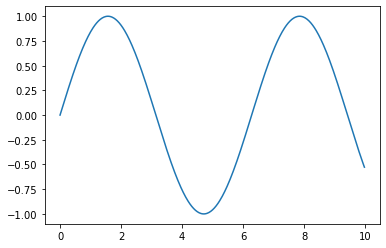

In [2]:
x = np.load("x.npy")
y = np.load("y.npy")
plt.plot(x, y)